## Import Basic libraries

In [913]:
# Usual libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#sklearn libraries
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Logistic regression
from sklearn.linear_model import LogisticRegression

# StatsModel
import statsmodels.api as sm

# Feature selection
from sklearn.feature_selection import RFE

# Confusion Marix
from sklearn import metrics

# VIF check
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Supress warnings
import warnings
warnings.filterwarnings('ignore')

#Global settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

## Data Understanding, Preparation, and Pre-Processing

### Read dataset

Let's read the dataset mounted on the drive

In [914]:
telecom_data = pd.read_csv("/content/drive/MyDrive/train.csv")
telecom_data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

### Get shape

Let's get basic details like the shape and the info

In [915]:
# Get the shape of the DS
telecom_data.shape

(69999, 172)

### Get info

In [916]:
# Get info
telecom_data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


### Create a dataframe showing the overall quiality of data

In [917]:
def metadata_matrix(data) : 
    return pd.DataFrame({
                'Datatype' : data.dtypes.astype(str), 
                'Non_Null_Count': data.count(axis = 0).astype(int), 
                'Null_Count': data.isnull().sum().astype(int), 
                'Null_Percentage': round(data.isnull().sum()/len(data) * 100 , 2), 
                'Unique_Values_Count': data.nunique().astype(int) 
                 }).sort_values(by='Null_Percentage', ascending=False)

metadata_matrix(telecom_data)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
arpu_3g_6,float64,17568,52431,74.90,5506
count_rech_2g_6,float64,17568,52431,74.90,30
night_pck_user_6,float64,17568,52431,74.90,2
arpu_2g_6,float64,17568,52431,74.90,5389
date_of_last_rech_data_6,object,17568,52431,74.90,30
total_rech_data_6,float64,17568,52431,74.90,36
av_rech_amt_data_6,float64,17568,52431,74.90,792
max_rech_data_6,float64,17568,52431,74.90,47
count_rech_3g_6,float64,17568,52431,74.90,23
fb_user_6,float64,17568,52431,74.90,2


Observations - 

We could see that they are some columns with just one unique value. We could drop them.

They are months 6,7,8 which needs handling missing values or dropping unrequired data.

Recharge has lots of nulls indicating that they are not frequent.

we can see that the columns with datetime values represented as object, they can be converted into datetime

### Let's derive a statistical view

In [918]:
## Statistical view
telecom_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,69999.0,34999.000000,20207.115084,0.000,17499.5000,34999.000,52498.5000,69998.000
circle_id,69999.0,109.000000,0.000000,109.000,109.0000,109.000,109.0000,109.000
loc_og_t2o_mou,69297.0,0.000000,0.000000,0.000,0.0000,0.000,0.0000,0.000
std_og_t2o_mou,69297.0,0.000000,0.000000,0.000,0.0000,0.000,0.0000,0.000
loc_ic_t2o_mou,69297.0,0.000000,0.000000,0.000,0.0000,0.000,0.0000,0.000
arpu_6,69999.0,283.134365,334.213918,-2258.709,93.5810,197.484,370.7910,27731.088
arpu_7,69999.0,278.185912,344.366927,-1289.715,86.7140,191.588,365.3695,35145.834
arpu_8,69999.0,278.858826,351.924315,-945.808,84.0950,192.234,369.9090,33543.624
onnet_mou_6,67231.0,133.153275,299.963093,0.000,7.4100,34.110,119.3900,7376.710
onnet_mou_7,67312.0,133.894438,311.277193,0.000,6.6750,32.280,115.8375,8157.780


In [919]:
## We can see that some columns are having just one value hence no variance would be found. Let's drop such columns

In [920]:
print("\n Before shape",telecom_data.shape)


 Before shape (69999, 172)


### Drop unique columns with just one values as no variance found

In [921]:
uniquecol=[]
for i in telecom_data.columns:
    if telecom_data[i].nunique() == 1:
        uniquecol.append(i)
    else:
        pass

telecom_data.drop(uniquecol, axis=1, inplace = True)
print("\n The following Columns are dropped as they have just one unique value within them.No variance in the model\n",
      uniquecol)


 The following Columns are dropped as they have just one unique value within them.No variance in the model
 ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


In [922]:
print("\n After shape",telecom_data.shape)


 After shape (69999, 159)


### Missing values

### Handling missing values

In [923]:
# Columns with high missing values , > 50%
metadata = metadata_matrix(telecom_data)
condition = metadata['Null_Percentage'] > 50 
high_missing_values = metadata[condition]
high_missing_values

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
arpu_3g_6,float64,17568,52431,74.90,5506
night_pck_user_6,float64,17568,52431,74.90,2
total_rech_data_6,float64,17568,52431,74.90,36
max_rech_data_6,float64,17568,52431,74.90,47
date_of_last_rech_data_6,object,17568,52431,74.90,30
count_rech_2g_6,float64,17568,52431,74.90,30
av_rech_amt_data_6,float64,17568,52431,74.90,792
fb_user_6,float64,17568,52431,74.90,2
count_rech_3g_6,float64,17568,52431,74.90,23
arpu_2g_6,float64,17568,52431,74.90,5389


In [924]:
# Dropping above columns with high missing values 
high_missing_value_columns = high_missing_values.index 
telecom_data.drop(columns=high_missing_value_columns, inplace=True)

In [925]:
telecom_data.shape

(69999, 129)

In [926]:
# Looking at remaining columns with missing values 
metadata_matrix(telecom_data)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
std_og_t2f_mou_8,float64,66296,3703,5.29,1945
loc_og_mou_8,float64,66296,3703,5.29,21950
loc_og_t2c_mou_8,float64,66296,3703,5.29,2204
loc_ic_t2m_mou_8,float64,66296,3703,5.29,19022
og_others_8,float64,66296,3703,5.29,179
loc_og_t2f_mou_8,float64,66296,3703,5.29,3311
loc_ic_t2f_mou_8,float64,66296,3703,5.29,6092
loc_ic_mou_8,float64,66296,3703,5.29,24182
loc_og_t2m_mou_8,float64,66296,3703,5.29,17616
std_og_mou_8,float64,66296,3703,5.29,21745


## EDA and Feature Engineering

### Handle month-6 data

In [927]:
# Month 6 has 3.95 % missing values across indicating it is not data isssue and is genuine

In [928]:
import re
sixth_month_columns = []
for column in telecom_data.columns:
    x = re.search("6$", column)
    if x:
        sixth_month_columns.append(column)
# missing_values.loc[sixth_month_columns].sort_values(by='Null_Percentage', ascending=False)
metadata = metadata_matrix(telecom_data)
condition = metadata.index.isin(sixth_month_columns)
sixth_month_metadata = metadata[condition]
sixth_month_metadata

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
og_others_6,float64,67231,2768,3.95,914
isd_og_mou_6,float64,67231,2768,3.95,1103
loc_ic_t2t_mou_6,float64,67231,2768,3.95,11637
loc_ic_mou_6,float64,67231,2768,3.95,24442
loc_ic_t2m_mou_6,float64,67231,2768,3.95,19034
loc_ic_t2f_mou_6,float64,67231,2768,3.95,6200
std_ic_t2m_mou_6,float64,67231,2768,3.95,7931
std_ic_t2f_mou_6,float64,67231,2768,3.95,2624
std_ic_mou_6,float64,67231,2768,3.95,9876
spl_ic_mou_6,float64,67231,2768,3.95,78


Note that all the columns with *_mou have exactly 3.94% rows with missing values.
This is an indicator of a meaningful missing values.
Further note that *_mou columns indicate minutes of usage, which are applicable only to customers using calling plans. It is probable that, the 3.94% customers not using calling plans.
This could confirmed by looking at 'total_og_mou_6' and 'total_ic_mou_6' related columns where _mou columns have missing values. If these columns are zero for a customer , then all _mou columns should be zero too.

In [929]:
#  columns with meaningful missing in 6th month 
sixth_month_meaningful_missing_condition = sixth_month_metadata['Null_Percentage'] == 3.95
sixth_month_meaningful_missing_cols = sixth_month_metadata[sixth_month_meaningful_missing_condition].index.values
sixth_month_meaningful_missing_cols

array(['og_others_6', 'isd_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_mou_6',
       'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'std_ic_t2m_mou_6',
       'std_ic_t2f_mou_6', 'std_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6',
       'ic_others_6', 'std_ic_t2t_mou_6', 'spl_og_mou_6',
       'loc_og_t2f_mou_6', 'loc_og_mou_6', 'roam_og_mou_6',
       'std_og_t2t_mou_6', 'std_og_mou_6', 'loc_og_t2t_mou_6',
       'roam_ic_mou_6', 'loc_og_t2c_mou_6', 'std_og_t2m_mou_6',
       'offnet_mou_6', 'loc_og_t2m_mou_6', 'std_og_t2f_mou_6',
       'onnet_mou_6'], dtype=object)

In [930]:
# Looking at all sixth month columns where rows of *_mou are null
condition = telecom_data[sixth_month_meaningful_missing_cols].isnull()
# data.loc[condition, sixth_month_columns]


# Rows is null for all the above columns 
missing_rows = pd.Series([True]*telecom_data.shape[0], index = telecom_data.index)
for column in sixth_month_meaningful_missing_cols : 
    missing_rows = missing_rows & telecom_data[column].isnull()

print('Total outgoing mou for each customer with missing *_mou data is ', telecom_data.loc[missing_rows,'total_og_mou_6'].unique()[0])
print('Total incoming mou for each customer with missing *_mou data is ', telecom_data.loc[missing_rows,'total_ic_mou_6'].unique()[0])

Total outgoing mou for each customer with missing *_mou data is  0.0
Total incoming mou for each customer with missing *_mou data is  0.0


Hence, these could be imputed with 0

In [931]:
# Imputation
telecom_data[sixth_month_meaningful_missing_cols] = telecom_data[sixth_month_meaningful_missing_cols].fillna(0)

metadata = metadata_matrix(telecom_data)

# Remaining Missing Values
metadata.iloc[metadata.index.isin(sixth_month_columns)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_6,object,68898,1101,1.57,30
total_rech_amt_6,int64,69999,0,0.00,2108
max_rech_amt_6,int64,69999,0,0.00,190
last_day_rch_amt_6,int64,69999,0,0.00,179
monthly_3g_6,int64,69999,0,0.00,10
sachet_2g_6,int64,69999,0,0.00,30
sachet_3g_6,int64,69999,0,0.00,23
monthly_2g_6,int64,69999,0,0.00,5
vol_3g_mb_6,float64,69999,0,0.00,9768
vol_2g_mb_6,float64,69999,0,0.00,11494


### Handling recharge for month 6

In [932]:
telecom_data[telecom_data['date_of_last_rech_6'].isnull()].filter(regex='.*rech.*6$', axis=1).head(3)

,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,date_of_last_rech_6
28,0,0,0,NaN
95,0,0,0,NaN
293,0,0,0,NaN


In [933]:
telecom_data[telecom_data['date_of_last_rech_6'].isnull()].filter(regex='.*rech.*6$', axis=1).nunique()

total_rech_num_6       1
total_rech_amt_6       1
max_rech_amt_6         1
date_of_last_rech_6    0
dtype: int64

Notice, that the recharge related columns for customers with missing 'date_of_last_rech_6' has just one unique value. From the first few rows of the output, we see that this is 0.
Hence, 'date_of_last_rech_6' is missing since there were no recharges made in this month.
These are meaning missing values

In [934]:
# Check for missing values in 6th month variables
metadata = metadata_matrix(telecom_data)
metadata[metadata.index.isin(sixth_month_columns)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_6,object,68898,1101,1.57,30
total_rech_amt_6,int64,69999,0,0.00,2108
max_rech_amt_6,int64,69999,0,0.00,190
last_day_rch_amt_6,int64,69999,0,0.00,179
monthly_3g_6,int64,69999,0,0.00,10
sachet_2g_6,int64,69999,0,0.00,30
sachet_3g_6,int64,69999,0,0.00,23
monthly_2g_6,int64,69999,0,0.00,5
vol_3g_mb_6,float64,69999,0,0.00,9768
vol_2g_mb_6,float64,69999,0,0.00,11494


### No more missing values for month-6

### Handling month-7 values

In [935]:
seventh_month_columns = telecom_data.filter(regex='7$', axis=1).columns
seventh_month_columns.sort_values(ascending=True)

Index(['arpu_7', 'date_of_last_rech_7', 'ic_others_7', 'isd_ic_mou_7',
       'isd_og_mou_7', 'last_day_rch_amt_7', 'loc_ic_mou_7',
       'loc_ic_t2f_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2t_mou_7',
       'loc_og_mou_7', 'loc_og_t2c_mou_7', 'loc_og_t2f_mou_7',
       'loc_og_t2m_mou_7', 'loc_og_t2t_mou_7', 'max_rech_amt_7',
       'monthly_2g_7', 'monthly_3g_7', 'offnet_mou_7', 'og_others_7',
       'onnet_mou_7', 'roam_ic_mou_7', 'roam_og_mou_7', 'sachet_2g_7',
       'sachet_3g_7', 'spl_ic_mou_7', 'spl_og_mou_7', 'std_ic_mou_7',
       'std_ic_t2f_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2t_mou_7',
       'std_og_mou_7', 'std_og_t2f_mou_7', 'std_og_t2m_mou_7',
       'std_og_t2t_mou_7', 'total_ic_mou_7', 'total_og_mou_7',
       'total_rech_amt_7', 'total_rech_num_7', 'vol_2g_mb_7', 'vol_3g_mb_7'],
      dtype='object')

In [936]:
seventh_month_metadata = metadata[metadata.index.isin(seventh_month_columns)]
seventh_month_metadata

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
std_ic_t2t_mou_7,float64,67312,2687,3.84,5479
std_og_mou_7,float64,67312,2687,3.84,22088
roam_og_mou_7,float64,67312,2687,3.84,5305
loc_ic_t2m_mou_7,float64,67312,2687,3.84,18945
isd_og_mou_7,float64,67312,2687,3.84,1084
loc_ic_t2t_mou_7,float64,67312,2687,3.84,11595
spl_og_mou_7,float64,67312,2687,3.84,3827
roam_ic_mou_7,float64,67312,2687,3.84,4240
std_ic_mou_7,float64,67312,2687,3.84,10112
og_others_7,float64,67312,2687,3.84,148


Note that all the columns with *_mou have exactly 3.86% rows with missing values.
This is an indicator of a meaningful missing values.
Further note that *_mou columns indicate minutes of usage, which are applicable only to customers using calling plans. It is probable that, the 3.86% customers not using calling plans.
This could confirmed by looking at 'total_og_mou_7' and 'total_ic_mou_7' related columns where _mou columns have missing values. If these columns are zero for a customer , then all _mou columns should be zero too.

In [937]:
#  columns with meaningful missing in 7th month 
seventh_month_meaningful_missing_condition = seventh_month_metadata['Null_Percentage'] == 3.84
seventh_month_meaningful_missing_cols = seventh_month_metadata[seventh_month_meaningful_missing_condition].index.values
seventh_month_meaningful_missing_cols

array(['std_ic_t2t_mou_7', 'std_og_mou_7', 'roam_og_mou_7',
       'loc_ic_t2m_mou_7', 'isd_og_mou_7', 'loc_ic_t2t_mou_7',
       'spl_og_mou_7', 'roam_ic_mou_7', 'std_ic_mou_7', 'og_others_7',
       'loc_og_t2f_mou_7', 'std_ic_t2m_mou_7', 'std_og_t2f_mou_7',
       'std_ic_t2f_mou_7', 'spl_ic_mou_7', 'loc_ic_t2f_mou_7',
       'std_og_t2m_mou_7', 'loc_og_t2t_mou_7', 'std_og_t2t_mou_7',
       'isd_ic_mou_7', 'loc_og_mou_7', 'loc_ic_mou_7', 'offnet_mou_7',
       'loc_og_t2c_mou_7', 'ic_others_7', 'loc_og_t2m_mou_7',
       'onnet_mou_7'], dtype=object)

In [938]:
# Looking at all 7th month columns where rows of *_mou are null
condition = telecom_data[seventh_month_meaningful_missing_cols].isnull()

# Rows is null for all the above columns 
missing_rows = pd.Series([True]*telecom_data.shape[0], index = telecom_data.index)
for column in seventh_month_meaningful_missing_cols : 
    missing_rows = missing_rows & telecom_data[column].isnull()

print('Total outgoing mou for each customer with missing *_mou data is ', telecom_data.loc[missing_rows,'total_og_mou_7'].unique()[0])
print('Total incoming mou for each customer with missing *_mou data is ', telecom_data.loc[missing_rows,'total_ic_mou_7'].unique()[0])

Total outgoing mou for each customer with missing *_mou data is  0.0
Total incoming mou for each customer with missing *_mou data is  0.0


Hence, these could be imputed with 0

In [939]:
# Imputation
telecom_data[seventh_month_meaningful_missing_cols] = telecom_data[seventh_month_meaningful_missing_cols].fillna(0)

metadata = metadata_matrix(telecom_data)

# Remaining Missing Values
metadata.iloc[metadata.index.isin(seventh_month_columns)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_7,object,68765,1234,1.76,31
ic_others_7,float64,69999,0,0.00,1658
monthly_3g_7,int64,69999,0,0.00,13
isd_ic_mou_7,float64,69999,0,0.00,4640
sachet_3g_7,int64,69999,0,0.00,26
total_rech_num_7,int64,69999,0,0.00,96
spl_ic_mou_7,float64,69999,0,0.00,103
total_ic_mou_7,float64,69999,0,0.00,27418
std_ic_mou_7,float64,69999,0,0.00,10112
vol_3g_mb_7,float64,69999,0,0.00,10296


### Handling recharge for month 7

In [940]:
telecom_data[telecom_data['date_of_last_rech_7'].isnull()].filter(regex='.*rech.*7$', axis=1).head(3)

,total_rech_num_7,total_rech_amt_7,max_rech_amt_7,date_of_last_rech_7
31,0,0,0,NaN
76,0,0,0,NaN
136,0,0,0,NaN


In [941]:
telecom_data[telecom_data['date_of_last_rech_7'].isnull()].filter(regex='.*rech.*7$', axis=1).nunique()

total_rech_num_7       1
total_rech_amt_7       1
max_rech_amt_7         1
date_of_last_rech_7    0
dtype: int64

Notice, that the recharge related columns for customers with missing 'date_of_last_rech_7' has just one unique value. From the first few rows of the output, we see that this is 0. Hence, 'date_of_last_rech_7' is missing since there were no recharges made in this month. These are meaning missing values


In [942]:
metadata = metadata_matrix(telecom_data)
metadata[metadata.index.isin(seventh_month_columns)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_7,object,68765,1234,1.76,31
ic_others_7,float64,69999,0,0.00,1658
monthly_3g_7,int64,69999,0,0.00,13
isd_ic_mou_7,float64,69999,0,0.00,4640
sachet_3g_7,int64,69999,0,0.00,26
total_rech_num_7,int64,69999,0,0.00,96
spl_ic_mou_7,float64,69999,0,0.00,103
total_ic_mou_7,float64,69999,0,0.00,27418
std_ic_mou_7,float64,69999,0,0.00,10112
vol_3g_mb_7,float64,69999,0,0.00,10296


### No more missing values for month-7

### Handling month-8 values

In [943]:
eigth_month_columns = telecom_data.filter(regex='8$', axis=1).columns
eigth_month_columns.sort_values(ascending=True)

Index(['arpu_8', 'date_of_last_rech_8', 'ic_others_8', 'isd_ic_mou_8',
       'isd_og_mou_8', 'last_day_rch_amt_8', 'loc_ic_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2t_mou_8',
       'loc_og_mou_8', 'loc_og_t2c_mou_8', 'loc_og_t2f_mou_8',
       'loc_og_t2m_mou_8', 'loc_og_t2t_mou_8', 'max_rech_amt_8',
       'monthly_2g_8', 'monthly_3g_8', 'offnet_mou_8', 'og_others_8',
       'onnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'sachet_2g_8',
       'sachet_3g_8', 'spl_ic_mou_8', 'spl_og_mou_8', 'std_ic_mou_8',
       'std_ic_t2f_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2t_mou_8',
       'std_og_mou_8', 'std_og_t2f_mou_8', 'std_og_t2m_mou_8',
       'std_og_t2t_mou_8', 'total_ic_mou_8', 'total_og_mou_8',
       'total_rech_amt_8', 'total_rech_num_8', 'vol_2g_mb_8', 'vol_3g_mb_8'],
      dtype='object')

In [944]:
eigth_month_metadata = metadata[metadata.index.isin(eigth_month_columns)]
eigth_month_metadata

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
std_ic_t2f_mou_8,float64,66296,3703,5.29,2583
ic_others_8,float64,66296,3703,5.29,1565
std_og_t2t_mou_8,float64,66296,3703,5.29,14483
loc_og_t2f_mou_8,float64,66296,3703,5.29,3311
std_og_t2m_mou_8,float64,66296,3703,5.29,15968
std_og_t2f_mou_8,float64,66296,3703,5.29,1945
loc_og_t2m_mou_8,float64,66296,3703,5.29,17616
std_og_mou_8,float64,66296,3703,5.29,21745
isd_og_mou_8,float64,66296,3703,5.29,1008
loc_og_t2t_mou_8,float64,66296,3703,5.29,11296


Note that all the columns with *_mou have exactly 5.29% rows with missing values. This is an indicator of a meaningful missing values. Further note that *_mou columns indicate minutes of usage, which are applicable only to customers using calling plans. It is probable that, the 3.86% customers not using calling plans. This could confirmed by looking at 'total_og_mou_8' and 'total_ic_mou_8' related columns where _mou columns have missing values. If these columns are zero for a customer , then all _mou columns should be zero too.


In [945]:
#  columns with meaningful missing in 8th month 
eigth_month_meaningful_missing_condition = eigth_month_metadata['Null_Percentage'] == 5.29
eigth_month_meaningful_missing_cols = eigth_month_metadata[eigth_month_meaningful_missing_condition].index.values
eigth_month_meaningful_missing_cols

array(['std_ic_t2f_mou_8', 'ic_others_8', 'std_og_t2t_mou_8',
       'loc_og_t2f_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8',
       'loc_og_t2m_mou_8', 'std_og_mou_8', 'isd_og_mou_8',
       'loc_og_t2t_mou_8', 'spl_og_mou_8', 'og_others_8', 'roam_og_mou_8',
       'loc_ic_t2t_mou_8', 'loc_og_t2c_mou_8', 'roam_ic_mou_8',
       'isd_ic_mou_8', 'loc_ic_t2m_mou_8', 'offnet_mou_8',
       'loc_ic_t2f_mou_8', 'spl_ic_mou_8', 'onnet_mou_8', 'loc_ic_mou_8',
       'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_mou_8',
       'loc_og_mou_8'], dtype=object)

In [946]:
# Looking at all 8th month columns where rows of *_mou are null
condition = telecom_data[eigth_month_meaningful_missing_cols].isnull()

In [947]:
# Rows is null for all the above columns 
missing_rows = pd.Series([True]*telecom_data.shape[0], index = telecom_data.index)
for column in eigth_month_meaningful_missing_cols : 
    missing_rows = missing_rows & telecom_data[column].isnull()


print('Total outgoing mou for each customer with missing *_mou data is ', telecom_data.loc[missing_rows,'total_og_mou_8'].unique()[0])
print('Total incoming mou for each customer with missing *_mou data is ', telecom_data.loc[missing_rows,'total_ic_mou_8'].unique()[0])

Total outgoing mou for each customer with missing *_mou data is  0.0
Total incoming mou for each customer with missing *_mou data is  0.0


Hence, these could be imputed with 0

In [948]:
# Imputation
telecom_data[eigth_month_meaningful_missing_cols] = telecom_data[eigth_month_meaningful_missing_cols].fillna(0)

metadata = metadata_matrix(telecom_data)

In [949]:
# Remaining Missing Values
metadata.iloc[metadata.index.isin(eigth_month_columns)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_8,object,67538,2461,3.52,31
total_rech_num_8,int64,69999,0,0.00,92
ic_others_8,float64,69999,0,0.00,1565
isd_ic_mou_8,float64,69999,0,0.00,4694
spl_ic_mou_8,float64,69999,0,0.00,95
total_ic_mou_8,float64,69999,0,0.00,27318
std_ic_mou_8,float64,69999,0,0.00,9939
std_ic_t2f_mou_8,float64,69999,0,0.00,2583
std_ic_t2m_mou_8,float64,69999,0,0.00,7906
std_ic_t2t_mou_8,float64,69999,0,0.00,5367


In [950]:
### Handling recharge for month 8

telecom_data[telecom_data['date_of_last_rech_8'].isnull()].filter(regex='.*rech.*8$', axis=1).head(3)

telecom_data[telecom_data['date_of_last_rech_8'].isnull()].filter(regex='.*rech.*8$', axis=1).nunique()

total_rech_num_8       1
total_rech_amt_8       1
max_rech_amt_8         1
date_of_last_rech_8    0
dtype: int64

Notice, that the recharge related columns for customers with missing 'date_of_last_rech_8' has just one unique value. From the first few rows of the output, we see that this is 0. Hence, 'date_of_last_rech_8' is missing since there were no recharges made in this month. These are meaning missing values

In [951]:
metadata = metadata_matrix(telecom_data)
metadata[metadata.index.isin(eigth_month_columns)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_8,object,67538,2461,3.52,31
total_rech_num_8,int64,69999,0,0.00,92
ic_others_8,float64,69999,0,0.00,1565
isd_ic_mou_8,float64,69999,0,0.00,4694
spl_ic_mou_8,float64,69999,0,0.00,95
total_ic_mou_8,float64,69999,0,0.00,27318
std_ic_mou_8,float64,69999,0,0.00,9939
std_ic_t2f_mou_8,float64,69999,0,0.00,2583
std_ic_t2m_mou_8,float64,69999,0,0.00,7906
std_ic_t2t_mou_8,float64,69999,0,0.00,5367



### No more missing values for month-8

### Handling date varibales

In [952]:
# selecting all the columns with datetime format
date_col= telecom_data.select_dtypes(include=['object'])
print("\nThese are the columns available with datetime format represented as object\n",date_col.columns)

# Converting the selected columns to datetime format
for i in date_col.columns:
    telecom_data[i] = pd.to_datetime(telecom_data[i])


These are the columns available with datetime format represented as object
 Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'], dtype='object')


In [953]:
metadata_matrix(telecom_data)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_8,datetime64[ns],67538,2461,3.52,31
date_of_last_rech_7,datetime64[ns],68765,1234,1.76,31
date_of_last_rech_6,datetime64[ns],68898,1101,1.57,30
id,int64,69999,0,0.00,69999
spl_ic_mou_6,float64,69999,0,0.00,78
total_rech_num_8,int64,69999,0,0.00,92
total_rech_num_7,int64,69999,0,0.00,96
total_rech_num_6,int64,69999,0,0.00,94
ic_others_8,float64,69999,0,0.00,1565
ic_others_7,float64,69999,0,0.00,1658


### Target varibale distribution

0    89.811283
1    10.188717
Name: churn_probability, dtype: float64


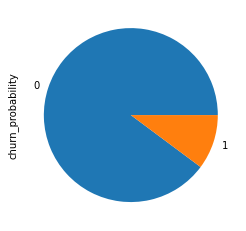

In [954]:
### Target varibale distribution

# lets find out churn/non churn percentage
print((telecom_data['churn_probability'].value_counts()/len(telecom_data))*100)
((telecom_data['churn_probability'].value_counts()/len(telecom_data))*100).plot(kind="pie")
plt.show()

Observation - Seems to be imbalanced dataset with very less churn data

### Relations of varibales with taget varibale

Text(0.5, 1.0, 'Features Correlating with Churn variable')

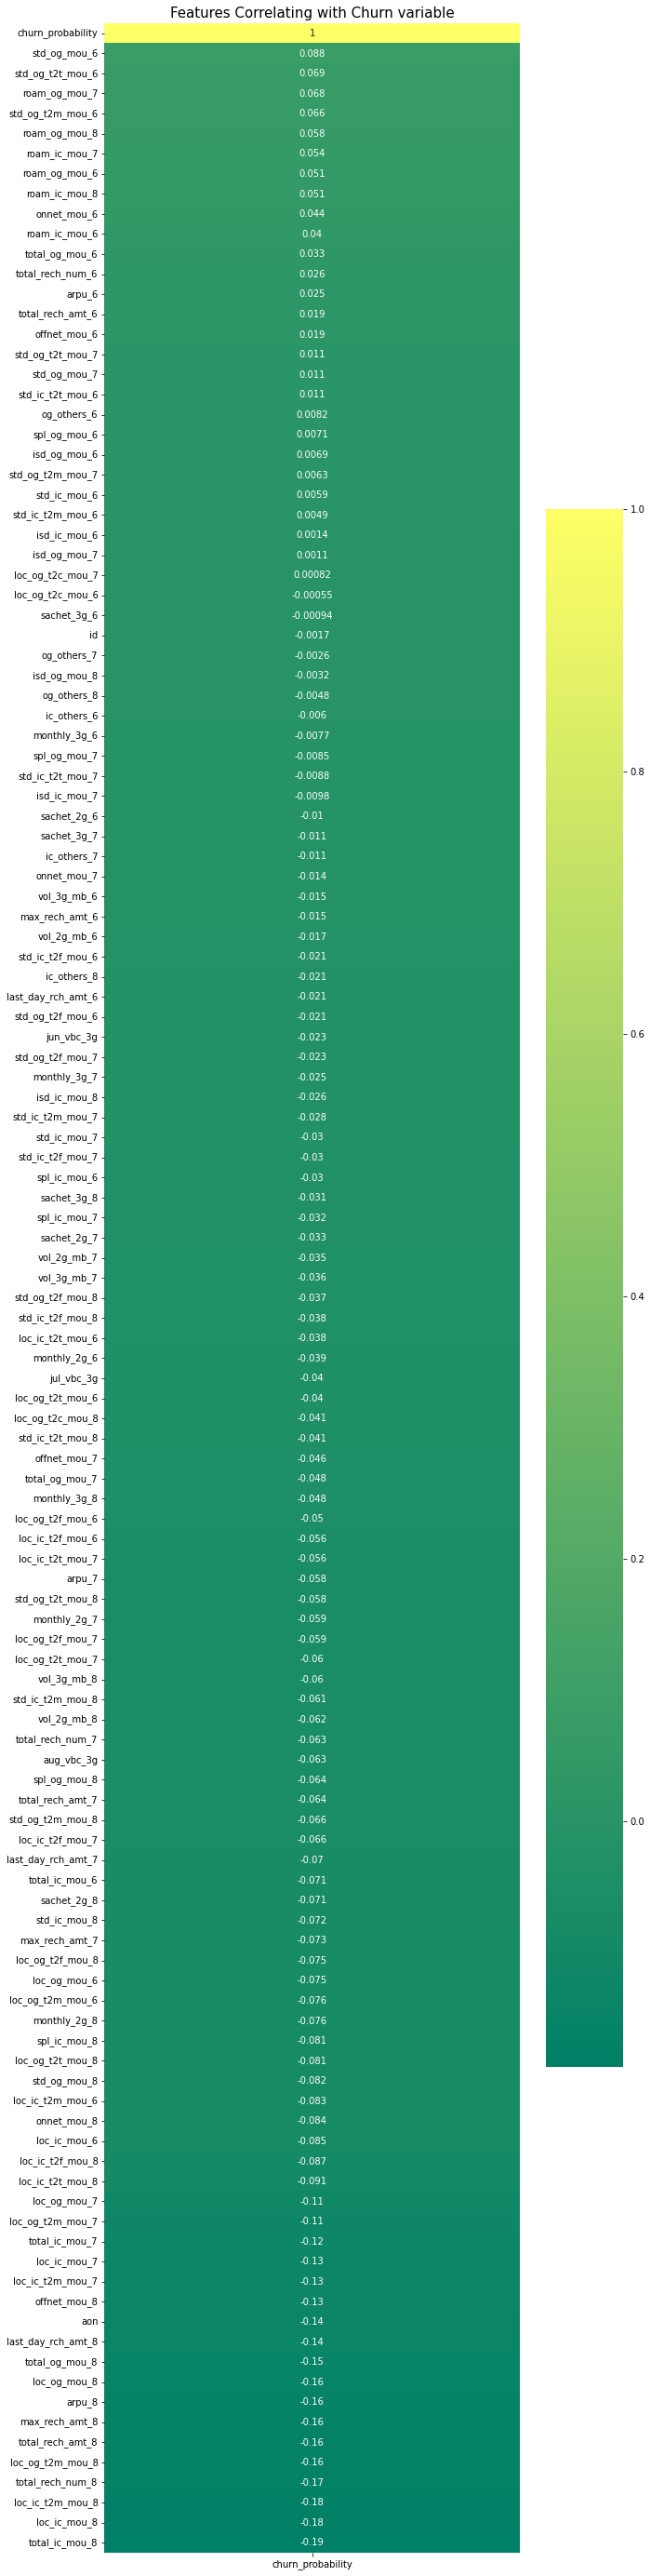

In [955]:
# Checking Correlation between target variable(SalePrice) with the other variable in the dataset
plt.figure(figsize=(10,50))
heatmap_churn = sns.heatmap(telecom_data.corr()[['churn_probability']].sort_values(ascending=False, by='churn_probability'),annot=True, 
                                cmap='summer')
heatmap_churn.set_title("Features Correlating with Churn variable", fontsize=15)

Observations

STD, Romaing have high positive corelations.

Avg Revenue, No. Of Recharge have negative correlation with churn.

In [956]:
# create box plot for  6th, 7th and 8th month
def plot_box_chart(attribute):
    plt.figure(figsize=(20,16))
    df = telecom_data
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=attribute+"_6",x="churn_probability",hue="churn_probability",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=attribute+"_7",x="churn_probability",hue="churn_probability",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=attribute+"_8",x="churn_probability",hue="churn_probability",
                showfliers=False,palette=("plasma"))
    plt.show()

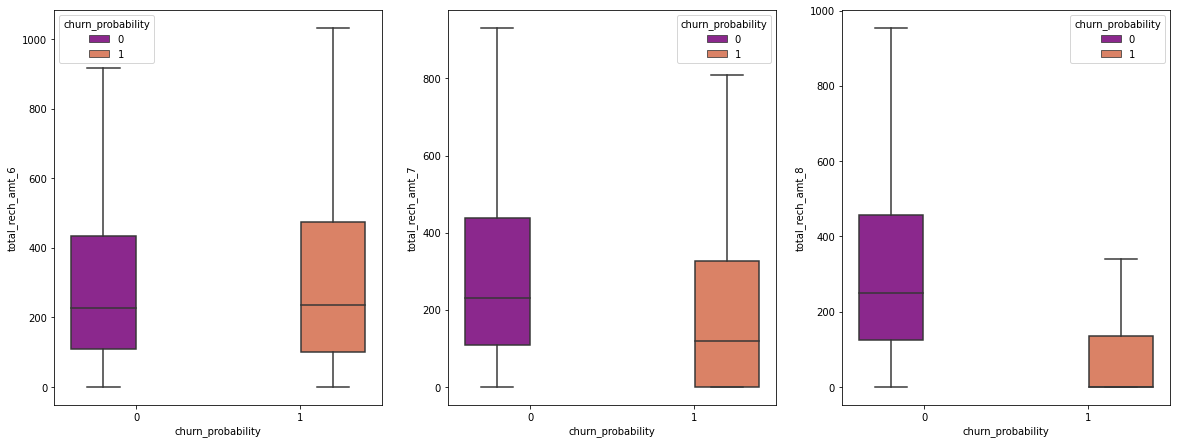

In [957]:
plot_box_chart('total_rech_amt')

Observation 


1.   Churn is high in month 6
2.   Churn is least in month 8




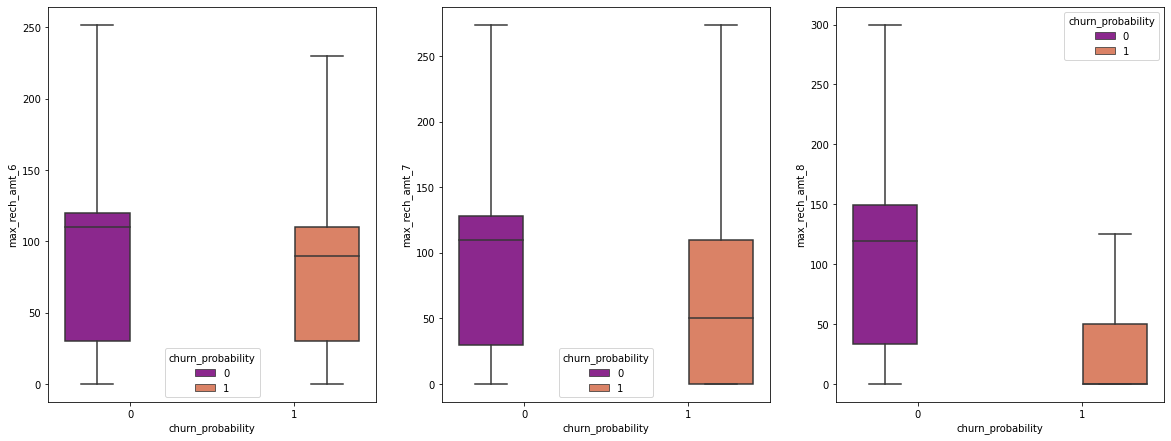

In [958]:
plot_box_chart('max_rech_amt')

Observation

1.   Max recharge were done in month 8
2.   Month 6,7 were almost equal



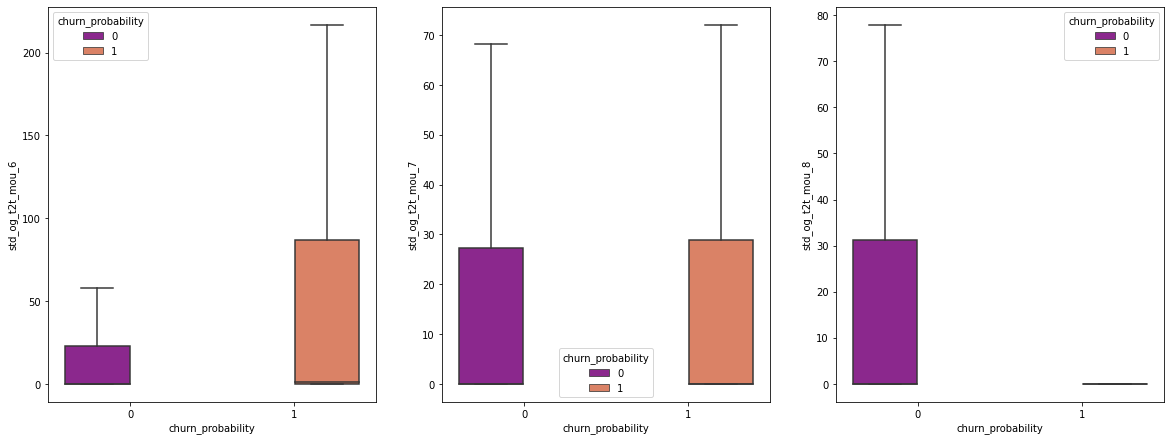

In [959]:
plot_box_chart('std_og_t2t_mou')

Observations


1.   High STD calls and churn occured during month 6,7
2.   Month 8 had no churn due to STD calls



### Creating a new variable called tenure

In [960]:
# creating a new variable 'tenure'
telecom_data['tenure'] = (telecom_data['aon']/30).round(0)

# Since we derived a new column from 'aon', we can drop it
telecom_data.drop('aon',axis=1, inplace=True)

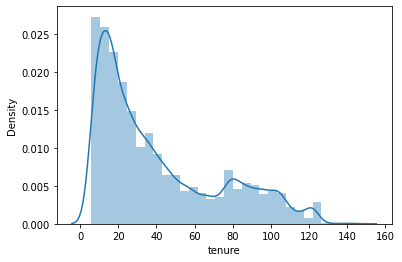

In [961]:
sns.distplot(telecom_data['tenure'],bins=30)
plt.show()

Observation

Most of the customers tend to stick for 1 month and then the curning begins

In [962]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
telecom_data['tenure_range'] = pd.cut(telecom_data['tenure'], tn_range, labels=tn_label)
telecom_data['tenure_range'].head()

0    NaN    
1    1-2 Yrs
2    2-5 Yrs
3    2-5 Yrs
4    1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

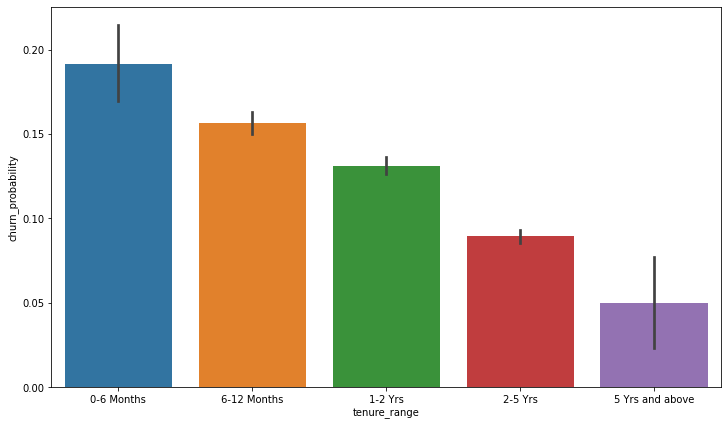

In [963]:
# Plotting a bar plot for tenure range
plt.figure(figsize=[12,7])
sns.barplot(x='tenure_range',y='churn_probability', data=telecom_data)
plt.show()

Observation

0-6 months has the highest churning 

### Month-6 total recharge vs average revenue

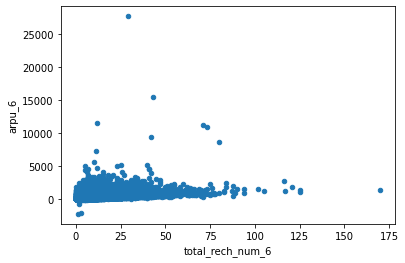

In [964]:
telecom_data[['total_rech_num_6', 'arpu_6']].plot.scatter(x = 'total_rech_num_6',
                                                              y='arpu_6')
plt.show()

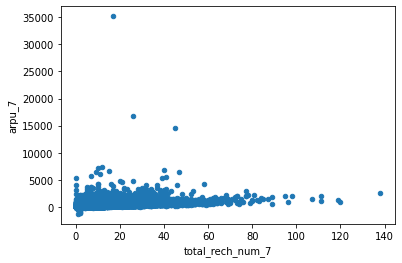

In [965]:
telecom_data[['total_rech_num_7', 'arpu_7']].plot.scatter(x = 'total_rech_num_7',
                                                              y='arpu_7')
plt.show()

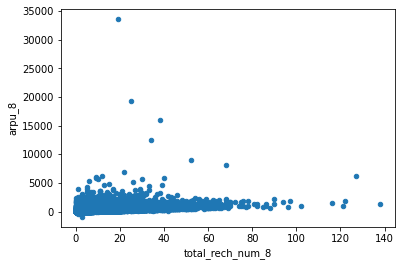

In [966]:
telecom_data[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8',
                                                              y='arpu_8')
plt.show()

Least recharges were done in month 8

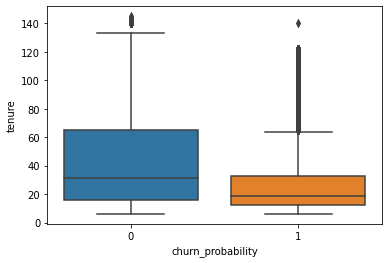

In [967]:
sns.boxplot(x = telecom_data.churn_probability, y = telecom_data.tenure)
plt.show()

From the above plot , its clear tenured customers do no churn and they keep availing telecom services

### Plot between churn vs max rechare amount - month 6

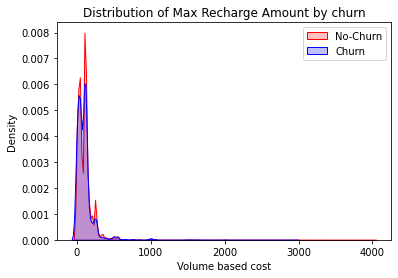

In [968]:
# Plot between churn vs max rechare amount
ax = sns.kdeplot(telecom_data.max_rech_amt_6[(telecom_data["churn_probability"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(telecom_data.max_rech_amt_6[(telecom_data["churn_probability"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Max Recharge Amount by churn')
plt.show()

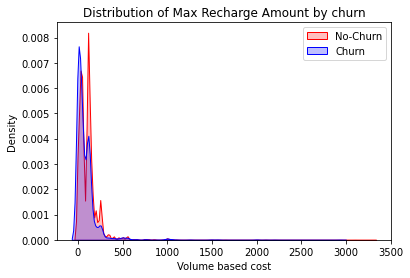

In [969]:
# Plot between churn vs max rechare amount
ax = sns.kdeplot(telecom_data.max_rech_amt_7[(telecom_data["churn_probability"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(telecom_data.max_rech_amt_7[(telecom_data["churn_probability"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Max Recharge Amount by churn')
plt.show()

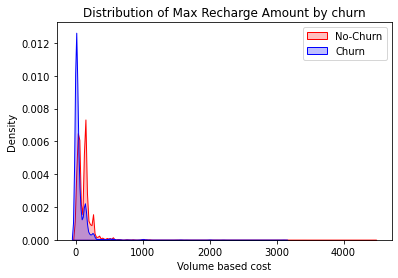

In [970]:
# Plot between churn vs max rechare amount
ax = sns.kdeplot(telecom_data.max_rech_amt_8[(telecom_data["churn_probability"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(telecom_data.max_rech_amt_8[(telecom_data["churn_probability"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Max Recharge Amount by churn')
plt.show()

Observation 

 Least rechrge and highest churn occurend in month 8
 Highest recharges months were 6,7



In [971]:
# Dropping tenure range column
telecom_data.drop(['tenure_range'],axis=1, inplace=True)


### Dropping unwanted columns related to date

In [972]:
# Dropping the columns related to datetime dtype from the dataset
telecom_data.drop(["date_of_last_rech_6","date_of_last_rech_7",
                   "date_of_last_rech_8"], axis=1, inplace=True)
print("\nThe columns 'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8' are dropped as it has no significance to the data\n")


The columns 'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8' are dropped as it has no significance to the data



### Converting all int columns to floats to handle imlablace data using  SMOTE method

In [973]:
num_col = telecom_data.select_dtypes(include = ['int64']).columns.tolist()
num_col
#df['Fee'] = df['Fee'].astype('int')

['id',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'last_day_rch_amt_6',
 'last_day_rch_amt_7',
 'last_day_rch_amt_8',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8',
 'churn_probability']

In [974]:
telecom_data['id'] = telecom_data['id'].astype('float64')
telecom_data['total_rech_num_6'] = telecom_data['total_rech_num_6'].astype('float64')
telecom_data['total_rech_num_7'] = telecom_data['total_rech_num_7'].astype('float64')
telecom_data['total_rech_num_8'] = telecom_data['total_rech_num_8'].astype('float64')

telecom_data['total_rech_amt_6'] = telecom_data['total_rech_amt_6'].astype('float64')
telecom_data['total_rech_amt_7'] = telecom_data['total_rech_amt_7'].astype('float64')
telecom_data['total_rech_amt_8'] = telecom_data['total_rech_amt_8'].astype('float64')

telecom_data['max_rech_amt_6'] = telecom_data['max_rech_amt_6'].astype('float64')
telecom_data['max_rech_amt_7'] = telecom_data['max_rech_amt_7'].astype('float64')
telecom_data['max_rech_amt_8'] = telecom_data['max_rech_amt_8'].astype('float64')

telecom_data['last_day_rch_amt_6'] = telecom_data['last_day_rch_amt_6'].astype('float64')
telecom_data['last_day_rch_amt_7'] = telecom_data['last_day_rch_amt_7'].astype('float64')
telecom_data['last_day_rch_amt_8'] = telecom_data['last_day_rch_amt_8'].astype('float64')

telecom_data['last_day_rch_amt_6'] = telecom_data['last_day_rch_amt_6'].astype('float64')
telecom_data['last_day_rch_amt_7'] = telecom_data['last_day_rch_amt_7'].astype('float64')
telecom_data['last_day_rch_amt_8'] = telecom_data['last_day_rch_amt_8'].astype('float64')


telecom_data['monthly_2g_6'] = telecom_data['monthly_2g_6'].astype('float64')
telecom_data['monthly_2g_7'] = telecom_data['monthly_2g_7'].astype('float64')
telecom_data['monthly_2g_8'] = telecom_data['monthly_2g_8'].astype('float64')


telecom_data['sachet_2g_6'] = telecom_data['sachet_2g_6'].astype('float64')
telecom_data['sachet_2g_7'] = telecom_data['sachet_2g_7'].astype('float64')
telecom_data['sachet_2g_8'] = telecom_data['sachet_2g_8'].astype('float64')

telecom_data['monthly_3g_6'] = telecom_data['monthly_3g_6'].astype('float64')
telecom_data['monthly_3g_7'] = telecom_data['monthly_3g_7'].astype('float64')
telecom_data['monthly_3g_8'] = telecom_data['monthly_3g_8'].astype('float64')

telecom_data['sachet_3g_6'] = telecom_data['sachet_3g_6'].astype('float64')
telecom_data['sachet_3g_7'] = telecom_data['sachet_3g_7'].astype('float64')
telecom_data['sachet_3g_8'] = telecom_data['sachet_3g_8'].astype('float64')

## Model selection, model building, evaluation & prediction

### Creating XTrain dataset

In [975]:
# lets create X dataset for model building.
X = telecom_data.drop(['churn_probability'],axis=1)
X.head(3)

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,tenure
0,0.0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.0,0.0,0.0,0.0,0.0,0.0,2.23,0.00,0.28,5.29,16.04,2.33,0.0,0.0,0.0,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.0,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3.0,2.0,2.0,77.0,65.0,10.0,65.0,65.0,10.0,65.0,65.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0
1,1.0,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.4,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3.0,4.0,5.0,0.0,145.0,50.0,0.0,145.0,50.0,0.0,0.0,0.0,0.0,352.91,0.0,0.0,3.96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0
2,2.0,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.53,12.98,0.00,24.11,0.00,0.00,0.0,0.0,0.0,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.0,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.0,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.0,0.0,0.0,29.91,2.48,6.38,124.29,33.83,36.64,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.25,2.0,4.0,2.0,70.0,120.0,0.0,70.0,70.0,0.0,70.0,50.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0


### Creating y Train

In [976]:
y=telecom_data['churn_probability']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: churn_probability, dtype: int64

In [977]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

Dimension of X_train: (55999, 125)
Dimension of X_test: (14000, 125)


### Applying scaling on numerical columns

In [978]:
num_col = X_train.select_dtypes(include = ['int64','float64']).columns.tolist()
print(num_col)

['id', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8

In [979]:
scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_train.head(3)

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,tenure
55007,0.785837,0.105423,0.067279,0.037168,0.205828,0.296054,0.019970,0.032333,0.026014,0.020015,0.000000,0.0,0.0,0.000000,0.0,0.0,0.236083,0.320507,0.019970,0.056568,0.039373,0.056368,0.000907,0.002183,0.001190,0.0,0.000000,0.0,0.167671,0.332671,0.044845,0.000000,0.000000,0.000000,0.000025,0.000307,0.00000,0.0,0.0,0.000000,0.000025,0.000251,0.000000,0.0,0.0,0.0,0.013917,0.005779,0.000047,0.000000,0.0,0.0,0.168546,0.312364,0.035259,0.049059,0.043056,0.016757,0.036726,0.015297,0.050115,0.008710,0.001735,0.006541,0.058515,0.048828,0.035882,0.000000,0.000000,0.000456,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000276,0.056584,0.048740,0.036036,0.005567,0.0,0.000000,0.0,0.0,0.0,0.000205,0.000374,0.000083,0.082353,0.181159,0.028986,0.028076,0.033817,0.008914,0.067082,0.038800,0.032367,0.027431,0.041290,0.02922,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.079137
16731,0.239021,0.101941,0.050170,0.040423,0.231900,0.132148,0.085932,0.010277,0.012561,0.002516,0.000000,0.0,0.0,0.000000,0.0,0.0,0.014649,0.009048,0.002405,0.012410,0.016361,0.005640,0.017860,0.010192,0.016964,0.0,0.000000,0.0,0.015365,0.019524,0.005782,0.218586,0.123783,0.111679,0.002746,0.001391,0.00000,0.0,0.0,0.001162,0.193651,0.123341,0.064049,0.0,0.0,0.0,0.002033,0.001922,0.001758,0.005981,0.0,0.0,0.168961,0.140052,0.068442,0.017592,0.008256,0.004533,0.019662,0.028758,0.012682,0.025038,0.050452,0.058102,0.028896,0.028762,0.017704,0.000833,0.006962,0.006342,0.011735,0.000384,0.000078,0.0,0.001417,0.000688,0.011437,0.005449,0.004084,0.034017,0.032553,0.019885,0.010121,0.0,0.029656,0.0,0.0,0.0,0.001401,0.000555,0.000000,0.064706,0.050725,0.101449,0.026172,0.013636,0.013261,0.027431,0.033343,0.032367,0.027431,0.035484,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.589928
54444,0.777794,0.081504,0.046333,0.038739,0.001739,0.001256,0.002424,0.007430,0.042375,0.018600,0.000537,0.0,0.0,0.000795,0.0,0.0,0.001917,0.000558,0.000240,0.005144,0.005484,0.004739,0.000000,0.002306,0.001190,0.0,0.001091,0.0,0.003428,0.004041,0.002427,0.000001,0.000743,0.002930,0.004262,0.041013,0

In [982]:
from imblearn.over_sampling import SMOTE
sm1 = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm1.fit_resample(X_train,y_train)

print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

Dimension of X_train_sm Shape: (100590, 125)
Dimension of y_train_sm Shape: (100590,)


### Applying Logistic Regression

In [983]:
logm1 = sm.GLM(y_train_sm,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:               100590
Model:                            GLM   Df Residuals:                   100464
Model Family:                Binomial   Df Model:                          125
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -36054.
Date:                Mon, 12 Dec 2022   Deviance:                       72109.
Time:                        16:20:56   Pearson chi2:                 3.89e+13
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.5581      0.478     -9.530      0.000      -5.496      -3.621
id                    -0.0424      0.033     -1.286      0.198      -0.107       0.022
arpu_6                43.7906      4.838      9.051      0.000      34.308      53.273
arpu_7                43.2877      5.753      7.524      0.000      32.012      54.564
arpu_8                80.0579      6.560     12.204      0.000      67.201      92.915
onnet_mou_6           61.1570     21.423      2.855      0.004      19.169     103.145
onnet_mou_7          -33.9737     18.176     -1.869      0.062     -69.598       1.651
onnet_mou_8          -42.9355     28.615     -1.500      0.133     -99.020      13.149
offnet_mou_6          82.2443     23.859      3.447      0.001      35.482     129.007
offnet_mou_7         -38.0187     15.077     -2.522      0.012     -67.569      -8.468
offnet_mou_8         -96.0587     36.145     -2.658      0.008    -166.902     -25.215
roam_ic_mou_6          1.5294      0.731      2.093      0.036       0.097       2.961
roam_ic_mou_7          5.2728      1.274      4.139      0.000       2.776       7.770
roam_ic_mou_8         -2.1562      0.786     -2.744      0.006      -3.696      -0.616
roam_og_mou_6        -38.4816     10.853     -3.546      0.000     -59.752     -17.211
roam_og_mou_7         11.1109      6.159      1.804      0.071      -0.961      23.183
roam_og_mou_8         43.5514     13.957      3.120      0.002      16.197      70.906
loc_og_t2t_mou_6    1.136e+05    1.3e+04      8.738      0.000    8.81e+04    1.39e+05
loc_og_t2t_mou_7    1.352e+05   1.52e+04      8.921      0.000    1.05e+05    1.65e+05
loc_og_t2t_mou_8    5.907e+05   2.34e+04     25.266      0.000    5.45e+05    6.36e+05
loc_og_t2m_mou_6    8.292e+04   9490.626      8.737      0.000    6.43e+04    1.02e+05
loc_og_t2m_mou_7    8.325e+04   9331.376      8.922      0.000     6.5e+04    1.02e+05
loc_og_t2m_mou_8    2.725e+05   1.08e+04     25.266      0.000    2.51e+05    2.94e+05
loc_og_t2f_mou_6     1.09e+04   1248.022      8.738      0.000    8458.837    1.34e+04
loc_og_t2f_mou_7     1.49e+04   1669.627      8.922      0.000    1.16e+04    1.82e+04
loc_og_t2f_mou_8    3.232e+04   1279.165     25.268      0.000    2.98e+04    3.48e+04
loc_og_t2c_mou_6      -2.9477      0.856     -3.445      0.001      -4.625      -1.270
loc_og_t2c_mou_7       1.9429      2.082      0.933      0.351      -2.137       6.023
loc_og_t2c_mou_8       3.3325      1.070      3.115      0.002       1.236       5.429
loc_og_mou_6       -2.178e+05   2.74e+04     -7.960      0.000   -2.71e+05   -1.64e+05
loc_og_mou_7       -1.631e+05   2.07e+04     -7.864      0.000   -2.04e+05   -1.22e+05
loc_og_mou_8        -3.69e+05    3.2e+04    -11.521      0.000   -4.32e+05   -3.06e+05
std_og_t2t_mou_6   -5.041e+04   1.97e+

### Running Feature selection with max 20 varibales

In [984]:
# running RFE with 20 variables as output
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train_sm,y_train_sm)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking


[False  True False False False False False False False False False False
 False False False  True False False False False False  True False False
 False False False False False False  True False False False False False
 False False False False False  True False False False False False False
  True False False False False False  True False False False False False
  True False False  True False False  True False False False False False
 False False False False False False False False False  True False  True
  True False False False False False False False False  True  True False
 False False False  True False False  True False False  True False False
 False False False False False False  True False False False False False
 False  True False False False]
[106   1   7  37  45  52  44  96  59  22  33  47  15  58   3   1 105  53
  21  94 102   1  91 104  10  31  57  55  95  70   1  72  64  23  88  51
  99  54 103   8  27   1  46  98  79  81  67  90   1  76 101  92  73  30
   1  78   6   5  8

### Print selected columns after feature selection

In [985]:
rfe_columns=X_train_sm.columns[rfe.support_]
print("The selected columns by RFE for modelling are: \n\n",rfe_columns)

The selected columns by RFE for modelling are: 

 Index(['arpu_6', 'roam_og_mou_8', 'loc_og_t2m_mou_8', 'loc_og_mou_8',
       'std_og_mou_7', 'spl_og_mou_8', 'total_og_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_7',
       'spl_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_6',
       'max_rech_amt_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'sachet_2g_8',
       'aug_vbc_3g'],
      dtype='object')


In [986]:
list(zip(X_train_sm.columns, rfe.support_, rfe.ranking_))

[('id', False, 106),
 ('arpu_6', True, 1),
 ('arpu_7', False, 7),
 ('arpu_8', False, 37),
 ('onnet_mou_6', False, 45),
 ('onnet_mou_7', False, 52),
 ('onnet_mou_8', False, 44),
 ('offnet_mou_6', False, 96),
 ('offnet_mou_7', False, 59),
 ('offnet_mou_8', False, 22),
 ('roam_ic_mou_6', False, 33),
 ('roam_ic_mou_7', False, 47),
 ('roam_ic_mou_8', False, 15),
 ('roam_og_mou_6', False, 58),
 ('roam_og_mou_7', False, 3),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 105),
 ('loc_og_t2t_mou_7', False, 53),
 ('loc_og_t2t_mou_8', False, 21),
 ('loc_og_t2m_mou_6', False, 94),
 ('loc_og_t2m_mou_7', False, 102),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 91),
 ('loc_og_t2f_mou_7', False, 104),
 ('loc_og_t2f_mou_8', False, 10),
 ('loc_og_t2c_mou_6', False, 31),
 ('loc_og_t2c_mou_7', False, 57),
 ('loc_og_t2c_mou_8', False, 55),
 ('loc_og_mou_6', False, 95),
 ('loc_og_mou_7', False, 70),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', False, 72),
 ('std_og_t2t_mou_7

### Assessing the model with StatsModels

In [987]:
X_train_SM = sm.add_constant(X_train_sm[rfe_columns])
logm2 = sm.GLM(y_train,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:               100590
Model:                            GLM   Df Residuals:                   100569
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -41942.
Date:                Mon, 12 Dec 2022   Deviance:                       83883.
Time:                        16:28:08   Pearson chi2:                 2.77e+10
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.1671      0.290     -7.477      0.000      -2.735      -1.599
arpu_6                49.1114      3.799     12.927      0.000      41.665      56.558
roam_og_mou_8         24.1771      0.836     28.922      0.000      22.539      25.815
loc_og_t2m_mou_8     -19.6980      1.894    -10.402      0.000     -23.410     -15.986
loc_og_mou_8          -5.3273      2.648     -2.012      0.044     -10.517      -0.138
std_og_mou_7           6.5616      0.341     19.231      0.000       5.893       7.230
spl_og_mou_8         -13.1768      1.306    -10.092      0.000     -15.736     -10.618
total_og_mou_8       -13.2363      0.812    -16.302      0.000     -14.828     -11.645
loc_ic_t2m_mou_8     -19.1078      1.839    -10.390      0.000     -22.712     -15.503
loc_ic_t2f_mou_8     -36.2622      2.111    -17.177      0.000     -40.400     -32.124
loc_ic_mou_8         -42.6207      4.003    -10.647      0.000     -50.467     -34.775
total_ic_mou_8       -19.0049      1.722    -11.034      0.000     -22.381     -15.629
spl_ic_mou_7         -16.1170      1.240    -13.002      0.000     -18.547     -13.687
spl_ic_mou_8        -119.2549      3.344    -35.667      0.000    -125.808    -112.702
total_rech_num_8     -11.1857      0.350    -31.937      0.000     -11.872     -10.499
total_rech_amt_6     -12.3768      3.713     -3.334      0.001     -19.654      -5.100
max_rech_amt_8        -9.0445      0.606    -14.917      0.000     -10.233      -7.856
last_day_rch_amt_8   -28.5314      0.850    -33.563      0.000     -30.198     -26.865
vol_2g_mb_8          -16.2932      1.018    -16.009      0.000     -18.288     -14.298
sachet_2g_8           -7.5081      0.528    -14.217      0.000      -8.543      -6.473
aug_vbc_3g            -9.1255      0.641    -14.246      0.000     -10.381      -7.870
======================================================================================
"""

In [988]:
# From the p-value of the individual columns, 
    # we can drop the column 'isd_ic_mou_8' as it has high p-value of 0.80
rfe_columns_1=rfe_columns.drop('loc_og_mou_8',1)
print("\nThe new set of edited featured are:\n",rfe_columns_1)


The new set of edited featured are:
 Index(['arpu_6', 'roam_og_mou_8', 'loc_og_t2m_mou_8', 'std_og_mou_7',
       'spl_og_mou_8', 'total_og_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_7',
       'spl_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_6',
       'max_rech_amt_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'sachet_2g_8',
       'aug_vbc_3g'],
      dtype='object')


In [989]:
# Training the model with the edited feature list -1
X_train_SM = sm.add_constant(X_train_sm[rfe_columns_1])
logm2 = sm.GLM(y_train,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:               100590
Model:                            GLM   Df Residuals:                   100570
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -41944.
Date:                Mon, 12 Dec 2022   Deviance:                       83888.
Time:                        16:28:56   Pearson chi2:                 2.75e+10
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.1629      0.289     -7.472      0.000      -2.730      -1.596
arpu_6                49.0463      3.795     12.924      0.000      41.608      56.484
roam_og_mou_8         24.1819      0.836     28.930      0.000      22.544      25.820
loc_og_t2m_mou_8     -22.4877      1.283    -17.524      0.000     -25.003     -19.973
std_og_mou_7           6.7016      0.335     20.021      0.000       6.046       7.358
spl_og_mou_8         -13.1622      1.306    -10.081      0.000     -15.721     -10.603
total_og_mou_8       -13.6623      0.787    -17.356      0.000     -15.205     -12.119
loc_ic_t2m_mou_8     -18.2640      1.799    -10.151      0.000     -21.791     -14.737
loc_ic_t2f_mou_8     -36.1122      2.112    -17.097      0.000     -40.252     -31.972
loc_ic_mou_8         -44.8106      3.877    -11.559      0.000     -52.409     -37.213
total_ic_mou_8       -18.8973      1.720    -10.986      0.000     -22.269     -15.526
spl_ic_mou_7         -16.1449      1.240    -13.021      0.000     -18.575     -13.715
spl_ic_mou_8        -119.1682      3.343    -35.651      0.000    -125.720    -112.617
total_rech_num_8     -11.1488      0.350    -31.888      0.000     -11.834     -10.464
total_rech_amt_6     -12.4489      3.710     -3.356      0.001     -19.720      -5.178
max_rech_amt_8        -9.0783      0.606    -14.980      0.000     -10.266      -7.891
last_day_rch_amt_8   -28.5133      0.850    -33.555      0.000     -30.179     -26.848
vol_2g_mb_8          -16.2767      1.018    -15.995      0.000     -18.271     -14.282
sachet_2g_8           -7.5371      0.528    -14.270      0.000      -8.572      -6.502
aug_vbc_3g            -9.1277      0.641    -14.249      0.000     -10.383      -7.872
======================================================================================
"""

Observation - ALl P-values are 0 indicating we are good to go

### Perfroming prediction on XTrain

In [990]:
# Getting the predicted values on the train set
y_train_sm_pred = res.predict(X_train_SM)
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]

array([0.0183325 , 0.00201488, 0.26368803, 0.10265536, 0.67043948,
       0.89971459, 0.47181701, 0.03258328, 0.28972521, 0.84128889])

### Creating a dataframe with the actual churn flag and the predicted probabilities

In [991]:
y_train_sm_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_sm_pred})
y_train_sm_pred_final.head()

,Converted,Converted_prob
0,0,0.018332
1,0,0.002015
2,0,0.263688
3,0,0.102655
4,0,0.670439


### Creating new column 'churn_pred' with 1 if Churn_Prob > 0.58 else 0

In [1004]:
y_train_sm_pred_final['churn_pred'] = y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > 0.58 else 0)

# Viewing the prediction results
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.018332,0,1,0,0,0,0,0,0,0,0,0
1,0,0.002015,0,1,0,0,0,0,0,0,0,0,0
2,0,0.263688,0,1,1,1,0,0,0,0,0,0,0
3,0,0.102655,0,1,1,0,0,0,0,0,0,0,0
4,0,0.670439,1,1,1,1,1,1,1,1,0,0,0


In [1005]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred )
print(confusion)

[[42313  7982]
 [ 7721 42574]]


In [1006]:
# Checking the overall accuracy.
print("The overall accuracy of the model is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred))

The overall accuracy of the model is: 0.8438910428472015


### VIF Check

In [1007]:
# Check for the VIF values of the feature variables. 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_columns_1].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_columns].values, i) for i in range(X_train[rfe_columns_1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,total_ic_mou_8,10.18
10,spl_ic_mou_7,7.56
7,loc_ic_t2f_mou_8,4.57
3,std_og_mou_7,4.53
6,loc_ic_t2m_mou_8,4.44
2,loc_og_t2m_mou_8,4.00
15,last_day_rch_amt_8,3.54
0,arpu_6,3.34
13,total_rech_amt_6,3.21
16,vol_2g_mb_8,2.67


Observation - Accept spl_ic_mou_7,total_rech_num_8 all are under 5 which is good

### Metrics beyond simply accuracy

In [1008]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

### Sensitivity, Specificity, False Positive Rate,Precision, True Negative Prediction Rate

In [1009]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity = ",TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP/ float(TN+FP))

# positive predictive value 
print ("Precision = ",TP / float(TP+FP))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN / float(TN+ FN))

Sensitivity =  0.8464857341684064
Specificity =  0.8412963515259966
False Positive Rate =  0.15870364847400337
Precision =  0.842115673708363
True Negative Prediction Rate =  0.8456849342447136


### Plotting the ROC Curve

In [1010]:
# Defining a function to plot the roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Prediction Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1011]:
# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob, drop_intermediate = False )

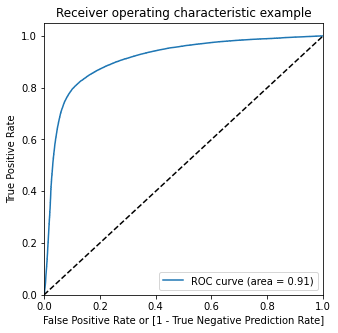

In [1012]:
# Plotting the curve for the obtained metrics
draw_roc(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

### Finding Optimal Cutoff Point

In [1013]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.018332,0,1,0,0,0,0,0,0,0,0,0
1,0,0.002015,0,1,0,0,0,0,0,0,0,0,0
2,0,0.263688,0,1,1,1,0,0,0,0,0,0,0
3,0,0.102655,0,1,1,0,0,0,0,0,0,0,0
4,0,0.670439,1,1,1,1,1,1,1,1,0,0,0


In [1014]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0  0.0          0.500000  1.000000     0.000000   
0.1  0.1          0.697177  0.971727     0.422627   
0.2  0.2          0.748981  0.954667     0.543295   
0.3  0.3          0.785058  0.933850     0.636266   
0.4  0.4          0.812645  0.909315     0.715976   
0.5  0.5          0.833562  0.877264     0.789860   
0.6  0.6          0.845253  0.837041     0.853465   
0.7  0.7          0.843046  0.773834     0.912258   
0.8  0.8          0.779670  0.600557     0.958783   
0.9  0.9          0.542986  0.094065     0.991908   


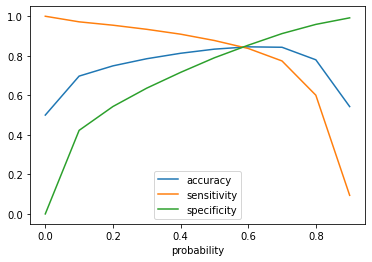

In [1015]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

Observation - 0.58 seems to be good choice

## Logistic Regression using PCA

In [1016]:
# split the dateset into train and test datasets
from imblearn.over_sampling import SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.001, train_size=0.999, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

# apply scaling on the dataset

scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])

# Applying SMOTE technique for data imbalance correction

sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

X_train_sm.head()

Dimension of X_train: (69929, 125)
Dimension of X_test: (70, 125)
Dimension of X_train_sm Shape: (125620, 125)
Dimension of y_train_sm Shape: (125620,)


,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,tenure
0,0.171862,0.080912,0.041120,0.033632,0.006682,0.007690,0.004499,0.020370,0.016387,0.010088,0.000000,0.001331,0.001134,0.000000,0.007144,0.000555,0.007664,0.007976,0.004499,0.024651,0.015380,0.022812,0.036173,0.022825,0.037040,0.000000,0.000000,0.000000,0.017610,0.019250,0.016609,0.000000,0.000000,0.000000,0.001645,0.000628,0.000178,0.0,0.004315,0.0,0.001622,0.000758,0.000178,0.0,0.0,0.0,0.018110,0.001741,0.000800,0.000000,0.0,0.0,0.020577,0.019076,0.013297,0.004419,0.000920,0.001975,0.040917,0.043406,0.019085,0.028260,0.012975,0.018160,0.032824,0.023550,0.015690,0.000000,0.0,0.000000,0.000722,0.002122,0.000967,0.0,0.003459,0.000953,0.000714,0.002514,0.001177,0.032287,0.025228,0.016310,0.017206,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000041,0.023529,0.028986,0.043478,0.005683,0.004958,0.005516,0.012469,0.015156,0.011238,0.012469,0.016129,0.011238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.043165
1,0.663176,0.076874,0.039587,0.032837,0.004491,0.002388,0.001203,0.004814,0.013748,0.005949,0.000502,0.000000,0.000000,0.000132,0.000000,0.000000,0.005074,0.002197,0.001203,0.006917,0.008472,0.008212,0.012565,0.059902,0.071699,0.000000,0.000000,0.000000,0.006848,0.013516,0.008683,0.000000,0.000395,0.000000,0.000000,0.001416,0.000029,0.0,0.000000,0.0,0.000000,0.001544,0.000029,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.006829,0.014040,0.006855,0.006921,0.001232,0.000842,0.005379,0.011511,0.005715,0.000000,0.000782,0.004790,0.008148,0.006654,0.004851,0.000000,0.0,0.000000,0.000443,0.000000,0.000000,0.0,0.031433,0.000000,0.000438,0.005294,0.000000,0.011512,0.010984,0.004916,0.000000,0.0,0.0,0.003768,0.001221,0.0,0.000000,0.000000,0.000579,0.017647,0.036232,0.036232,0.003126,0.000000,0.007657,0.027431,0.000000,0.056192,0.027431,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.071942
2,0.993328,0.082481,0.039973,0.032916,0.000595,0.001861,0.000010,0.021966,0.024436,0.017651,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000683,0.002051,0.000010,0.035466,0.028239,0.039594,0.000000,0.006427,0.002210,0.000000,0.004835,0.055595,0.016064,0.019431,0.017922,0.000000

In [1017]:
# importing PCA
from sklearn.decomposition import PCA
pca = PCA(random_state=42)

# applying PCA on train data
pca.fit(X_train_sm)

PCA(random_state=42)

In [1018]:
X_train_sm_pca=pca.fit_transform(X_train_sm)
print("Dimension of X_train_sm_pca: ",X_train_sm_pca.shape)

X_test_pca=pca.transform(X_test)
print("Dimension of X_test_pca: ",X_test_pca.shape)

Dimension of X_train_sm_pca:  (125620, 125)
Dimension of X_test_pca:  (70, 125)


In [1019]:
#Viewing the PCA components
pca.components_

array([[ 9.99854157e-01, -4.07673937e-04,  1.45740534e-04, ...,
         3.89020860e-04,  2.38567550e-04,  1.51336666e-02],
       [-1.57545179e-02,  9.61285057e-04,  2.11350665e-03, ...,
         4.60411574e-03,  3.11608805e-03,  9.90009649e-01],
       [ 3.45065304e-03,  5.06590529e-02,  4.56215948e-02, ...,
         4.98180509e-03,  1.83636455e-03,  2.53535916e-02],
       ...,
       [ 6.52916119e-09, -9.20626244e-08, -1.82725104e-08, ...,
         5.14274736e-08, -6.96077346e-08,  9.11516336e-09],
       [ 3.85149691e-09, -1.24620976e-06, -1.83476609e-06, ...,
        -8.53383304e-08,  6.28378260e-08, -3.85110728e-08],
       [ 3.94018929e-09, -1.30143941e-07, -8.68656927e-07, ...,
         1.83150017e-08, -3.62249294e-08,  1.92330398e-09]])

In [1020]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg_pca = LogisticRegression()
logreg_pca.fit(X_train_sm_pca, y_train_sm)

# making the predictions
y_pred = logreg_pca.predict(X_test_pca)

# converting the prediction into a dataframe
y_pred_df = pd.DataFrame(y_pred)
print("Dimension of y_pred_df:", y_pred_df.shape)

Dimension of y_pred_df: (70, 1)


In [1021]:
y_pred_df.head()

,0
0,0
1,1
2,0
3,1
4,0


In [1022]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Checking the Confusion matrix
print("Confusion Matirx for y_test & y_pred\n",confusion_matrix(y_test,y_pred),"\n")

# Checking the Accuracy of the Predicted model.
print("Accuracy of the logistic regression model with PCA: ",accuracy_score(y_test,y_pred))

Confusion Matirx for y_test & y_pred
 [[44 13]
 [ 4  9]] 

Accuracy of the logistic regression model with PCA:  0.7571428571428571


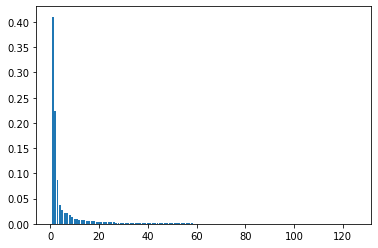

In [1023]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)
plt.show()

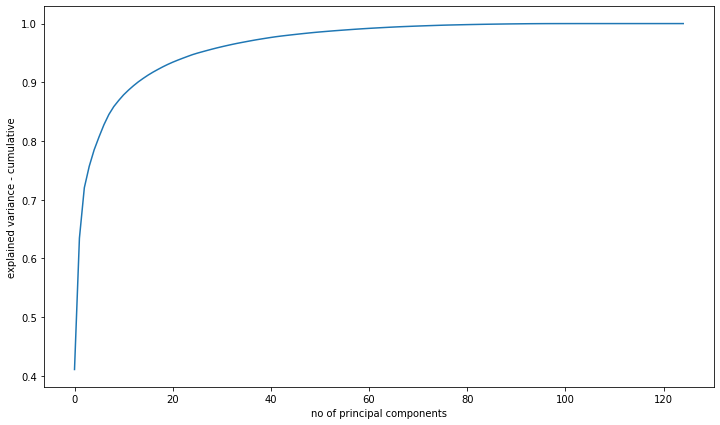

In [1024]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

# Making a scree plot
fig = plt.figure(figsize=[12,7])
plt.plot(var_cumu)
plt.xlabel('no of principal components')
plt.ylabel('explained variance - cumulative')
plt.show()

In [1025]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)

array([41.1, 63.5, 72.1, 75.8, 78.6, 80.8, 82.9, 84.6, 85.9, 86.9, 87.9,
       88.7, 89.4, 90.1, 90.7, 91.3, 91.8, 92.3, 92.7, 93.1, 93.5, 93.8,
       94.1, 94.4, 94.7, 95. , 95.2, 95.4, 95.6, 95.8, 96. , 96.2, 96.4,
       96.6, 96.8, 97. , 97.2, 97.4, 97.5, 97.6, 97.7, 97.8, 97.9, 98. ,
       98.1, 98.2, 98.3, 98.4, 98.5, 98.6, 98.7, 98.8, 98.9, 99. , 99.1,
       99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7,
       99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7,
       99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7,
       99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7,
       99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7,
       99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7, 99.7,
       99.7, 99.7, 99.7, 99.7])

*90% of the data can be explained with 9 PCA components

### Fitting the dataset with the 9 explainable components

In [1026]:
pca_9 = PCA(n_components=9)

train_pca_9 = pca_9.fit_transform(X_train_sm)
print("Dimension for Train dataset using PCA: ", train_pca_9.shape)

test_pca_9 = pca_9.transform(X_test)
print("Dimension for Test dataset using PCA: ", test_pca_9.shape)

Dimension for Train dataset using PCA:  (125620, 9)
Dimension for Test dataset using PCA:  (70, 9)


In [1027]:
logreg_pca_9 = LogisticRegression()
logreg_pca_9.fit(train_pca_9, y_train_sm)

# making the predictions
y_pred_9 = logreg_pca_9.predict(test_pca_9)

# converting the prediction into a dataframe
y_pred_df_9 = pd.DataFrame(y_pred_9)
print("Dimension of y_pred_df_9: ", y_pred_df_9.shape)

Dimension of y_pred_df_9:  (70, 1)


In [1028]:
# Checking the Confusion matrix
print("Confusion Matirx for y_test & y_pred\n",confusion_matrix(y_test,y_pred_9),"\n")

# Checking the Accuracy of the Predicted model.
print("Accuracy of the logistic regression model with PCA: ",accuracy_score(y_test,y_pred_9))

Confusion Matirx for y_test & y_pred
 [[43 14]
 [ 4  9]] 

Accuracy of the logistic regression model with PCA:  0.7428571428571429


## Dealing with real test data (solution file)